In [1]:
%pylab inline
import numpy as np
from scipy.signal import gaussian
from scipy.ndimage import filters

Populating the interactive namespace from numpy and matplotlib


In [2]:
base_dir = '../Re_17500'

In [3]:
fc = np.load(base_dir+'/forceCoeffs.npy')
time = fc[100:,0]
Cd = fc[100:,1]
Cl = fc[100:,2]

(0.0, 1020.0)

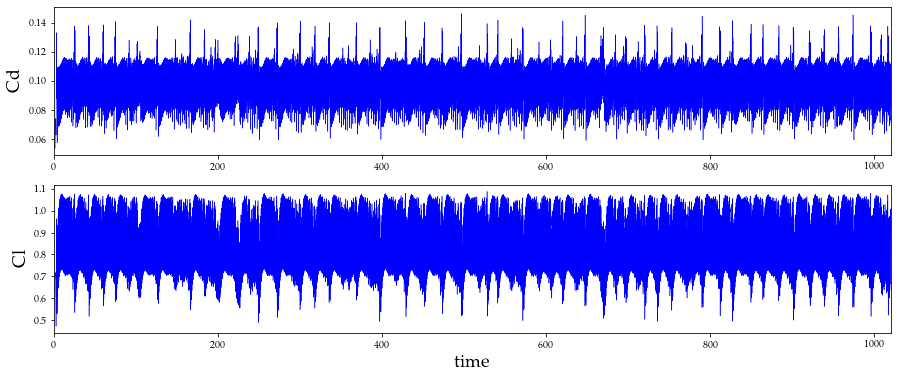

In [4]:
figure(figsize = (15,6))

subplot(2,1,1)
plot(time, Cd, 'b', linewidth=0.5)
xlim([time[0], time[-1]])
xlim([0,1020])
ylabel('Cd', fontsize = 18)

subplot(2,1,2)
plot(time, Cl, 'b', linewidth=0.5)
xlim([time[0], time[-1]])
ylabel('Cl', fontsize = 18)
xlabel('time', fontsize = 18)
xlim([0,1020])

In [5]:
Cl_time = fc[10000:,0]; dt = 0.001
Cd = fc[10000:,1]
Cl = fc[10000:,2]

In [6]:
F_Cd = np.fft.fft(Cd - np.mean(Cd))
freqs = np.fft.fftfreq(len(Cd), d=dt)
f_peak = freqs[np.argmax(np.abs(F_Cd))]

width_smoother = int(3/(f_peak*dt))
scale_smoother = int(0.5/(f_peak*dt))
smoother_kern = gaussian(width_smoother, scale_smoother)
smoother_kern = smoother_kern/np.sum(smoother_kern)

q = filters.convolve1d(Cd, smoother_kern)
print('Mean / std q:', np.mean(q), np.std(q))
q = (q - np.mean(q))/np.std(q)

print('Dominant frequency/period:', f_peak, f_peak**-1)

Mean / std q: 0.09647288335072611 0.003311220773612503
Dominant frequency/period: 1.4396011097007728 0.694636863823934


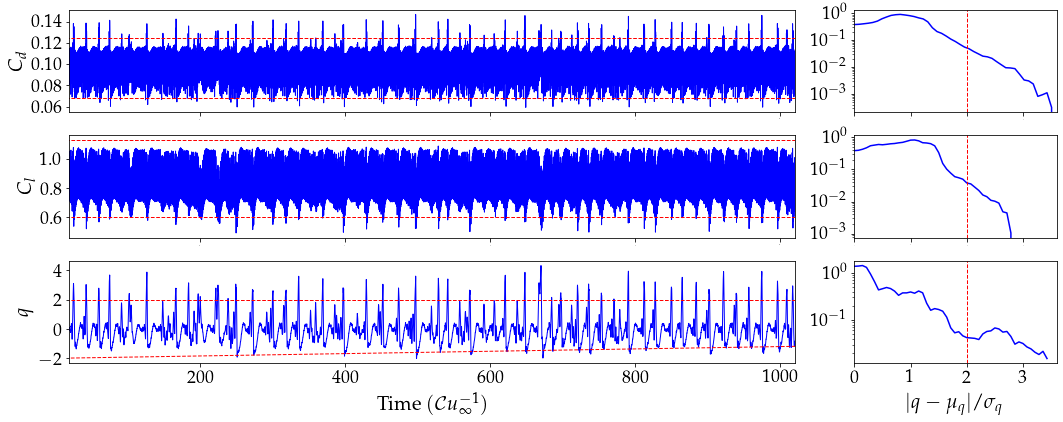

In [7]:
figure(figsize=(15,6))
label_fs = 18

start = 10000
end = -1

subplot2grid((3,4), (0,0), colspan=3,rowspan=1)
plot(Cl_time, Cd, 'b', linewidth=1)

nsigma = 2
# plot([0,250], [np.mean(Cd),np.mean(Cd)], 'r--')
plot([0,5000], [np.mean(Cd) + nsigma*np.std(Cd),np.mean(Cd) + nsigma*np.std(Cd)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(Cd) - nsigma*np.std(Cd),np.mean(Cd) - nsigma*np.std(Cd)], 'r--', linewidth = 1)

xlim([Cl_time[start], Cl_time[end]])
ylabel(r'$C_d$',fontsize = label_fs+2)
xticks(fontsize = label_fs)
xticks(fontsize = 0)
yticks(fontsize = label_fs)

####################################################################################################

subplot2grid((3,4), (1,0), colspan=3,rowspan=1)
plot(Cl_time, Cl, 'b', linewidth=1)

# plot([0,250], [np.mean(Cl),np.mean(Cl)], 'r--')
plot([0,5000], [np.mean(Cl) + nsigma*np.std(Cl),np.mean(Cl) + nsigma*np.std(Cl)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(Cl) - nsigma*np.std(Cl),np.mean(Cl) - nsigma*np.std(Cl)], 'r--', linewidth = 1)

xlim([Cl_time[start], Cl_time[end]])
xticks(fontsize = label_fs)
xticks(fontsize = 0)
yticks(fontsize = label_fs)
ylabel(r'$C_l$',fontsize = label_fs+2)

####################################################################################################

subplot2grid((3,4), (2,0), colspan=3,rowspan=1)
plot(Cl_time, q, 'b', linewidth=1)
plot([0,5000], [np.mean(q) + nsigma*np.std(q),np.mean(q) + nsigma*np.std(q)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(q) - nsigma*np.std(q),np.mean(q) + nsigma*np.std(q)], 'r--', linewidth = 1)

# ylim([0.09,0.175])
xlim([Cl_time[start], Cl_time[end]])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
ylabel(r'$q$',fontsize = label_fs+2)
xlabel(r'Time $(\mathcal{C} u_\infty^{-1})$',fontsize = label_fs+2)

####################################################################################################

subplot2grid((3,4), (0,3), colspan=1,rowspan=1)
Cd_hist = np.histogram(np.abs(Cd-np.mean(Cd))/np.std(Cd), density = True, bins=np.linspace(0.0,4,50))
plot(Cd_hist[1][:-1], Cd_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xticks(fontsize = 0)
yscale('log')
#xlabel(r'$|C_d - \mu_{C_d}|/ \sigma_{C_d}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

subplot2grid((3,4), (1,3), colspan=1,rowspan=1)
# Cl_hist = hist(np.abs(Cl-np.mean(Cl))/np.std(Cl), density = True, 
#                bins=np.linspace(0.0,3.5,50), 
#                color = "b", ec="k")
Cl_hist = np.histogram(np.abs(Cl-np.mean(Cl))/np.std(Cl), density = True, bins=np.linspace(0.0,3.5,50))
plot(Cl_hist[1][:-1], Cl_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xticks(fontsize = 0)
yscale('log')
#xlabel(r'$|C_l - \mu_{C_l}|/ \sigma_{C_l}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

subplot2grid((3,4), (2,3), colspan=1,rowspan=1)
CdCl_hist = np.histogram(np.abs(q-np.mean(q))/np.std(q), density = True, bins=np.linspace(0.0,3.5,50))
plot(CdCl_hist[1][:-1], CdCl_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
yscale('log')
xlabel(r'$|q - \mu_{q}|/ \sigma_{q}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

tight_layout()

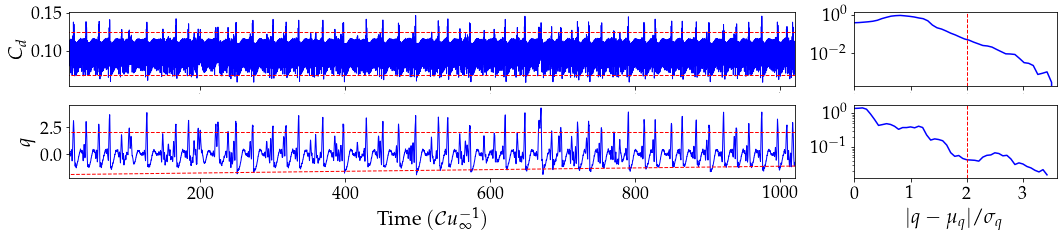

In [8]:
figure(figsize=(15,3.4))
label_fs = 18

start = 10000
end = -1

subplot2grid((2,4), (0,0), colspan=3,rowspan=1)
plot(Cl_time, Cd, 'b', linewidth=1)

nsigma = 2
# plot([0,250], [np.mean(Cd),np.mean(Cd)], 'r--')
plot([0,5000], [np.mean(Cd) + nsigma*np.std(Cd),np.mean(Cd) + nsigma*np.std(Cd)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(Cd) - nsigma*np.std(Cd),np.mean(Cd) - nsigma*np.std(Cd)], 'r--', linewidth = 1)

xlim([Cl_time[start], Cl_time[end]])
ylabel(r'$C_d$',fontsize = label_fs+2)
xticks(fontsize = label_fs)
xticks(fontsize = 0)
yticks(fontsize = label_fs)

####################################################################################################

subplot2grid((2,4), (1,0), colspan=3,rowspan=1)
plot(Cl_time, q, 'b', linewidth=1)
plot([0,5000], [np.mean(q) + nsigma*np.std(q),np.mean(q) + nsigma*np.std(q)], 'r--', linewidth = 1)
plot([0,5000], [np.mean(q) - nsigma*np.std(q),np.mean(q) + nsigma*np.std(q)], 'r--', linewidth = 1)

# ylim([0.09,0.175])
xlim([Cl_time[start], Cl_time[end]])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
ylabel(r'$q$',fontsize = label_fs+2)
xlabel(r'Time $(\mathcal{C} u_\infty^{-1})$',fontsize = label_fs+2)

####################################################################################################

subplot2grid((2,4), (0,3), colspan=1,rowspan=1)
Cd_hist = np.histogram(np.abs(Cd-np.mean(Cd))/np.std(Cd), density = True, bins=np.linspace(0.0,4,50))
plot(Cd_hist[1][:-1], Cd_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
xticks(fontsize = 0)
yscale('log')
#xlabel(r'$|C_d - \mu_{C_d}|/ \sigma_{C_d}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

subplot2grid((2,4), (1,3), colspan=1,rowspan=1)
CdCl_hist = np.histogram(np.abs(q-np.mean(q))/np.std(q), density = True, bins=np.linspace(0.0,3.5,50))
plot(CdCl_hist[1][:-1], CdCl_hist[0], 'b')
xlim([0,3.6])
xticks(fontsize = label_fs)
yticks(fontsize = label_fs)
yscale('log')
xlabel(r'$|q - \mu_{q}|/ \sigma_{q}$',fontsize = label_fs+2)
axvline(2, color = 'r', linestyle = '--', linewidth = 1)

tight_layout()